## Achilles Edwin Alfred Saxby
### aes807
### HW10_Assignment
### Lab9 - Spatial Data Analysis
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

#### Collaborated with:
    - Vishwajeet Shelar

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Libraries needed, Imported

In [2]:
import numpy as np
import pandas as pd
import shapely
import pysal as ps
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns

from pandas import DataFrame
from geopandas import GeoDataFrame
from matplotlib import colors
from fiona.crs import from_epsg

%matplotlib inline

## Working with Shape File

### Loading Census Tract Shape File¶

In [3]:
shape_path="Data/CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

### Coordinate systems, projections, and transformations 

In [4]:
ct_shape.crs = from_epsg(4326) 
# epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet

In [7]:
NYC_Area=ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) 
# from ft2 to mi2 

In [8]:
print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] 
# from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


### Visualize the Cencus Tract boundaries colored by boroughs

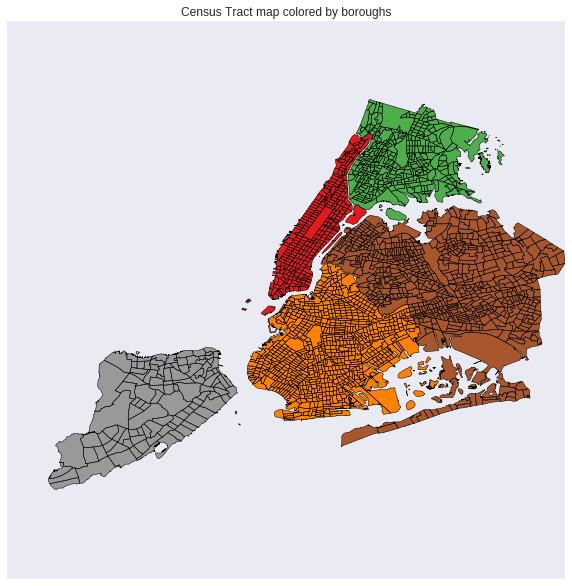

In [9]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map colored by boroughs")

#### Figure 1 : This figure represents the Census Tract Map of New York City - Borough Wise

### Map NYC Population density

#### Load Census Data for 2010

In [10]:
ct_data=DataFrame.from_csv('Data/ACS_CT2010.csv')
#set index to be the BoroCT2010 code
ct_data.index=ct_data.BoroCT2010.astype(str)

#### Add popuation density to CT shapefile

In [11]:
ct_data.head()

,BoroCT2010,Geo_NAME,Geo_QName,Geo_FIPS,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_COUNTYSC,Geo_COUSUB,...,SE_T017_017,SE_T017_018,SE_T017_019,SE_T017_020,SE_T017_021,SE_T017_022,SE_T017_023,SE_T017_024,SE_T017A001,SE_T017A002
BoroCT2010,,,,,,,,,,,,,,,,,,,,,
5000900,5000900,Census Tract 9,"Census Tract 9, Richmond County, New York",36085000900,140,0,36,85,19,NaN,...,32,23,13,12,10,12,11,7,746,50
5012500,5012500,Census Tract 125,"Census Tract 125, Richmond County, New York",36085012500,140,0,36,85,19,NaN,...,50,50,28,33,36,32,42,20,1522,89
5013301,5013301,Census Tract 133.01,"Census Tract 133.01, Richmond County, New York",36085013301,140,0,36,85,19,NaN,...,0,11,6,3,15,4,4,4,303,24
5019700,5019700,Census Tract 197,"Census Tract 197, Richmond County, New York",36085019700,140,0,36,85,19,NaN,...,48,56,36,50,54,32,44,36,1672,97
5002002,5002002,Census Tract 20.02,"Census Tract 20.02, Richmond County, New York",36085002002,140,0,36,85,19,NaN,...,73,126,53,73,114,83,63,63,2562,104


In [12]:
ct_shape_pop=ct_shape.join(ct_data[['SE_T002_002']]) 
#SE_T002_002 is population density in social explorer dataset

#### Vusualize the Population density for 2010

/opt/rh/anaconda/root/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


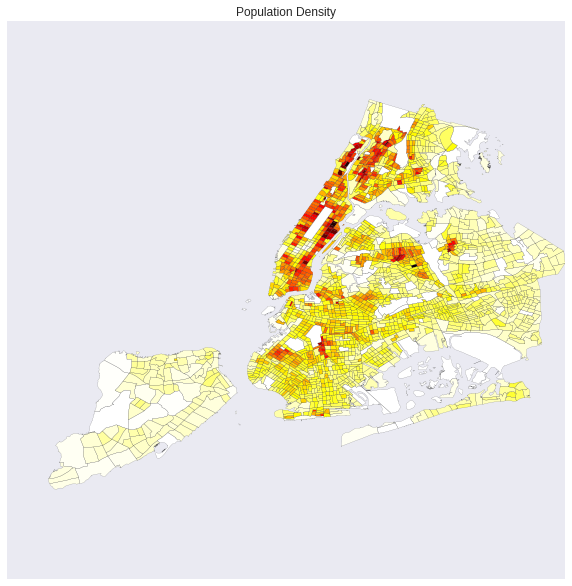

In [13]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Population Density")

#### Figure 2 : This figure represents the poplutation density of New York City
- The Red Spectrum shows the Maximum Population Density.
- Going all the way down to the White which symbolizes the Minimum.

## Explore CitiBike data

### Load CitiBike data

In [14]:
df_bike_monthly=DataFrame.from_csv('Data/CitiBike_monthly_byStation.csv')
df_bike_monthly.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_bike_monthly.index.name = None
df_bike_monthly.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0


### Splitting the Data into:
    - Summer (June to September)
    - Winter (December to March)

In [16]:
# Split data into summer months(June to September)
df_bike_summer = df_bike_monthly[((df_bike_monthly.index).month >= 6 ) & 
                            ((df_bike_monthly.index).month <= 9)]

In [17]:
# Split data into winter months
df_bike_winter = df_bike_monthly[((df_bike_monthly.index).month >= 12 ) | 
                            ((df_bike_monthly.index).month <= 3)]

### Time Series Aanalysis

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

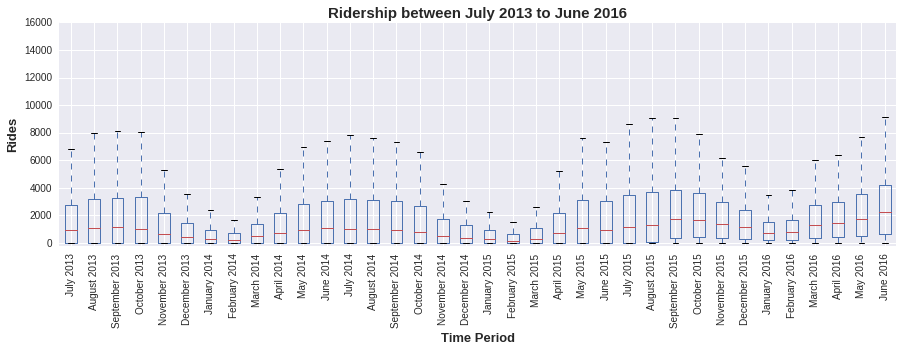

In [18]:
f, ax1 = plt.subplots(figsize=(15, 4))
#create a copy of the df for the viz purposes
df_bike_monthly_=df_bike_monthly.copy()
df_bike_monthly_.index=df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.T.boxplot(ax=ax1,rot=90);
ax1.set_title('Ridership between July 2013 to June 2016', fontsize = 15, fontweight = 'bold')
ax1.set_xlabel('Time Period', fontsize = 13, fontweight = 'bold')
ax1.set_ylabel('Rides', fontsize = 13, fontweight = 'bold')
ax1.set_ylim([-200,16000])

#### Figure 3: The plot above represents the variations of the citibike ridership from 2013 to 2016. 
    - It can be observed that the ridership follows a periodic pattern with less ridership in the Winters.

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

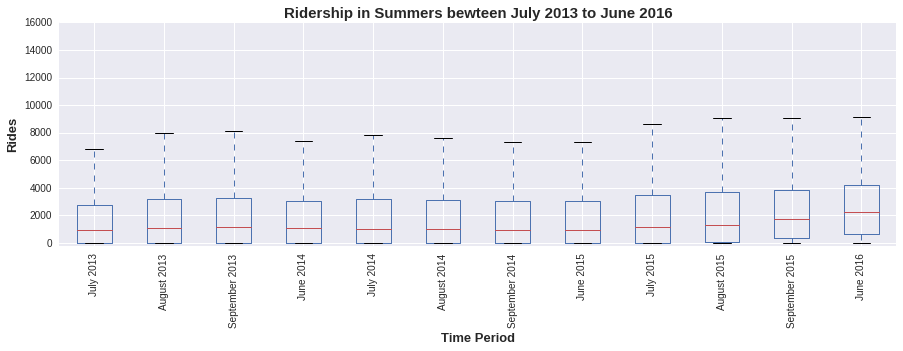

In [19]:
f, ax2 = plt.subplots(figsize=(15, 4))
#create a copy of the df for the viz purposes
df_bike_summer_=df_bike_summer.copy()
df_bike_summer_.index=df_bike_summer_.index.strftime("%B %Y")
df_bike_summer_.T.boxplot(ax=ax2,rot=90)
ax2.set_title('Ridership in Summers bewteen July 2013 to June 2016', fontsize = 15, fontweight = 'bold')
ax2.set_xlabel('Time Period', fontsize = 13, fontweight = 'bold')
ax2.set_ylabel('Rides', fontsize = 13, fontweight = 'bold')
ax2.set_ylim([-200,16000])

#### Figure 4: The plot above represents the variations of the citibike ridership from 2013 to 2016 - Summer (June to September). 
    - It can be observed that the ridership increases as the years move on.

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

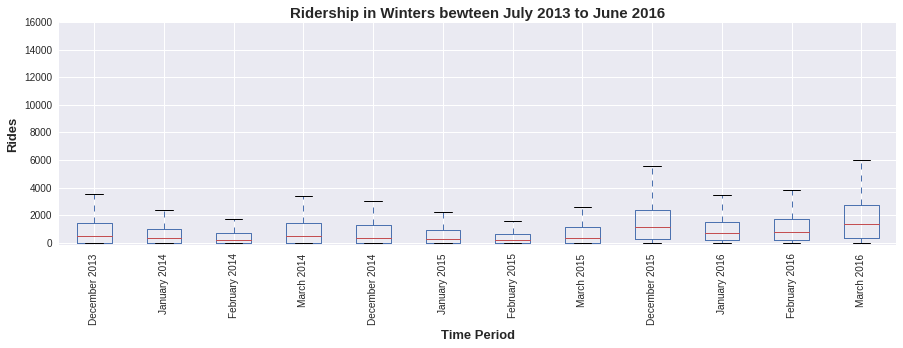

In [20]:
f, ax3 = plt.subplots(figsize=(15, 4))
#create a copy of the df for the viz purposes
df_bike_winter_=df_bike_winter.copy()
df_bike_winter_.index=df_bike_winter_.index.strftime("%B %Y")
df_bike_winter_.T.boxplot(ax=ax3,rot=90);
ax3.set_title('Ridership in Winters bewteen July 2013 to June 2016', fontsize = 15, fontweight = 'bold')
ax3.set_xlabel('Time Period', fontsize = 13, fontweight = 'bold')
ax3.set_ylabel('Rides', fontsize = 13, fontweight = 'bold')
ax3.set_ylim([-200,16000])

#### Figure 5 : The above boxplot shows variations of the citibike ridership from 2013 to 2016 in the winter months(December to March). 
- The rides are less as compared to the rides of citibikes in summer as seen in figure 4

#### Seasonal Decomposition

In [21]:
#Create a monthly time series of bike ride (Average of all citibike stations)
df_new=df_bike_monthly.mean(1).resample('M').mean()
df_new.interpolate(inplace=True)

/opt/rh/anaconda/root/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


NonGuiException: 

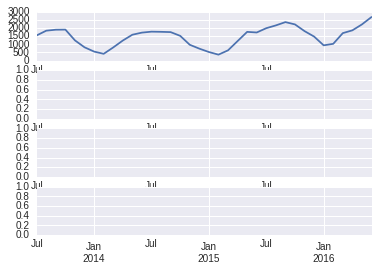

In [22]:
#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.dropna())
resplot = res.plot()
plt.rcParams['figure.figsize']=(12,8)
plt.rcParams['font.size']= 13
resplot.suptitle('Decomposition of Citibike Time Series',fontsize = 15, 
                x = 0.5, y = 1)

#### Even though there is shown an error the data works perfectly well, the problem occurs with the "compute" environment for some reason.

In [23]:
#Create a monthly time series of bike ride (Average of all citibike stations)
df_new_summer =df_bike_summer.mean(1).resample('M').mean()
df_new_summer.interpolate(inplace=True)

NonGuiException: 

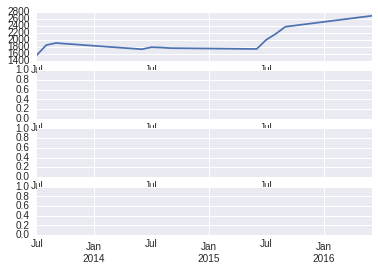

In [24]:
#Seasonal Decomposition using statsmodels api
res_summer = sm.tsa.seasonal_decompose(df_new_summer.dropna())
resplot_summer = res_summer.plot()
plt.rcParams['figure.figsize']=(12,8)
plt.rcParams['font.size']= 13
resplot_summer.suptitle('Decomposition of Citibike Summer rides Time Series ',fontsize = 15, 
                x = 0.5, y = 1)

#### Even though there is shown an error the data works perfectly well, the problem occurs with the "compute" environment for some reason.

In [25]:
#Create a monthly time series of bike ride (Average of all citibike stations)
df_new_winter =df_bike_winter.mean(1).resample('M').mean()
df_new_winter.interpolate(inplace=True)

NonGuiException: 

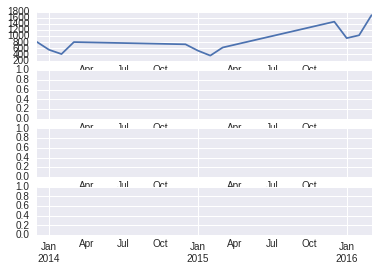

In [26]:
#Seasonal Decomposition using statsmodels api
res_winter = sm.tsa.seasonal_decompose(df_new_winter.dropna())
resplot_winter = res_winter.plot()
plt.rcParams['figure.figsize']=(12,8)
plt.rcParams['font.size']= 13
resplot_winter.suptitle('Decomposition of Citibike Winter rides Time Series',fontsize = 15, 
                x = 0.5, y = 1)

#### Even though there is shown an error the data works perfectly well, the problem occurs with the "compute" environment for some reason.

## Map CitiBike Data to CT level

### Load CitiBike station location data

In [27]:
station_id=DataFrame.from_csv('Data/Station_id.csv')
#convert station_ids to string index
station_id.index=station_id.index.astype(str)
station_id.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


### Create CitiBike station Geometry (Point) from Corrdinates (Lat & Lon)

In [28]:
# combine lat and lon to one column
station_id['lonlat']=zip(station_id.lon,station_id.lat)
# Create Point Geometry for based on lonlat column
station_id['geometry']=station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


### Intersect the two geometries

In [29]:
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id))[:4],
station_id['BoroCT2010']=a

% 100.


In [30]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

### Add Monthly rides to the station GeoDataFrame with CT code
- Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry

In [31]:
station_id['MonthlyAve']=df_bike_monthly.sum()

In [32]:
station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,MonthlyAve
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,69308
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,102824
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,273525
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,101949
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,184044


### Add the monthly average rides to the CT shapefile 
- Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry

In [33]:
station_id['MonthlyAve']=df_bike_monthly.sum()
station_id['MA_Summer']=df_bike_summer.sum()
station_id['MA_Winter']=df_bike_winter.sum()

In [34]:
temp=station_id[['MonthlyAve']]
temp_summer = station_id[['MA_Summer']]
temp_winter = station_id[['MA_Winter']]

temp['station_id']=station_id.index
temp_summer['station_id']=station_id.index
temp_winter['station_id']=station_id.index

temp.index=station_id['BoroCT2010']
temp_summer.index=station_id['BoroCT2010']
temp_winter.index=station_id['BoroCT2010']

ct_shape_MonthlyAve=ct_shape.join(temp)
ct_shape_MonthlyAve_Summer=ct_shape.join(temp_summer)
ct_shape_MonthlyAve_Winter=ct_shape.join(temp_winter)

ct_shape_MonthlyAve.fillna(0,inplace=True)
ct_shape_MonthlyAve_Winter.fillna(0,inplace=True)
ct_shape_MonthlyAve_Summer.fillna(0,inplace=True)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

### Mapping the Zoomed Census Tract by Monthly, Summer and Winter Data

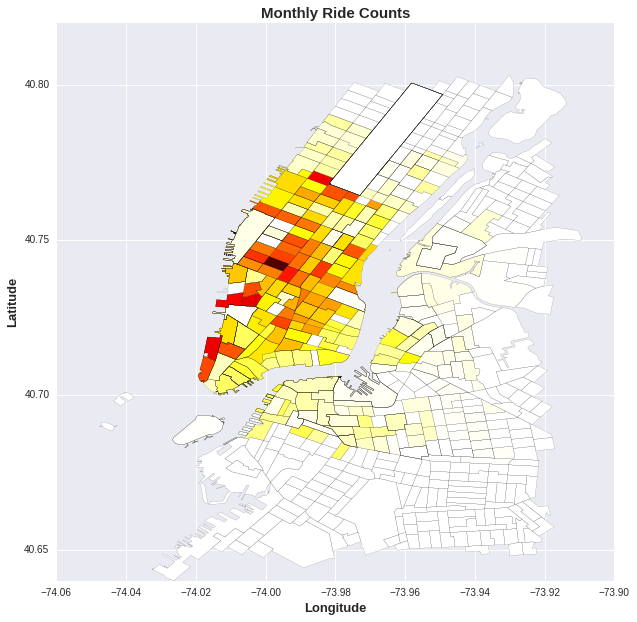

In [36]:
f, ax = plt.subplots(figsize=(10,10))

ct_shape_MonthlyAve_Zoom=(ct_shape_MonthlyAve[ct_shape_MonthlyAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and 
                                  c.x<-73.92 and 
                                  c.y>40.65 and 
                                  c.y<40.8)])

ct_shape_MonthlyAve_Zoom.plot(column='MonthlyAve',cmap='hot_r',
                         alpha=1,linewidth=0.1,ax=ax)
plt.xlabel('Longitude', fontsize = 13, fontweight = 'bold')
plt.ylabel('Latitude', fontsize = 13, fontweight = 'bold')
plt.title("Monthly Ride Counts", fontsize = 15, fontweight = 'bold')

#### Figure 9: The Monthly ride counts for the "CitiBike" Data throughout the year.
- It can be observed that the data is mostly concentrated around the Manhattan area due to the high population density and ease of travel and access for the "Citi-Bikes"
- Figures 6/7/8 - Showing unforseeable errors !!

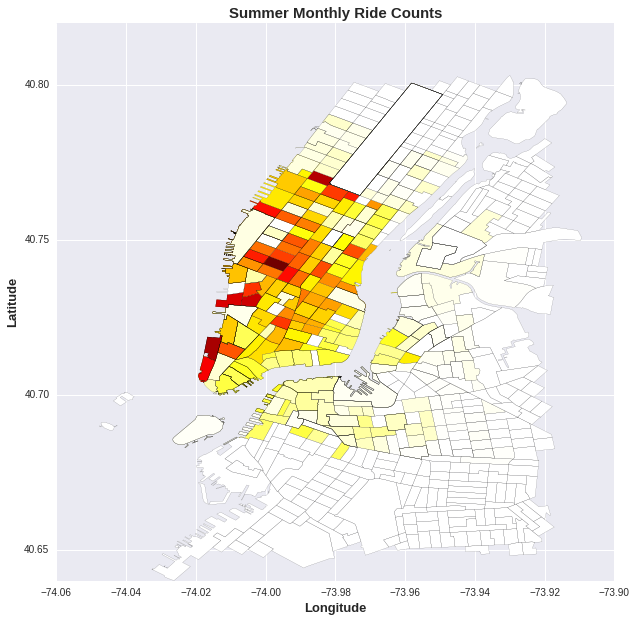

In [37]:
f, ax = plt.subplots(figsize=(10,10))
ct_shape_MonthlyAve_Summer_Zoom=(ct_shape_MonthlyAve_Summer[ct_shape_MonthlyAve_Summer
                           .centroid
                           .apply(lambda c:c.x>-74.1 and 
                                  c.x<-73.92 and 
                                  c.y>40.65 and 
                                  c.y<40.8)])
ct_shape_MonthlyAve_Summer_Zoom.plot(column='MA_Summer',cmap='hot_r',
                         alpha=1,linewidth=0.1,ax=ax)
plt.xlabel('Longitude', fontsize = 13, fontweight = 'bold')
plt.ylabel('Latitude', fontsize = 13, fontweight = 'bold')
plt.title("Summer Monthly Ride Counts", fontsize = 15, fontweight = 'bold')

#### Figure 10: The Summer-Time ride counts for the "CitiBike" Data.
- It can be observed that the data is mostly concentrated around the Manhattan area due to the high population density and ease of travel and access for the "Citi-Bikes"

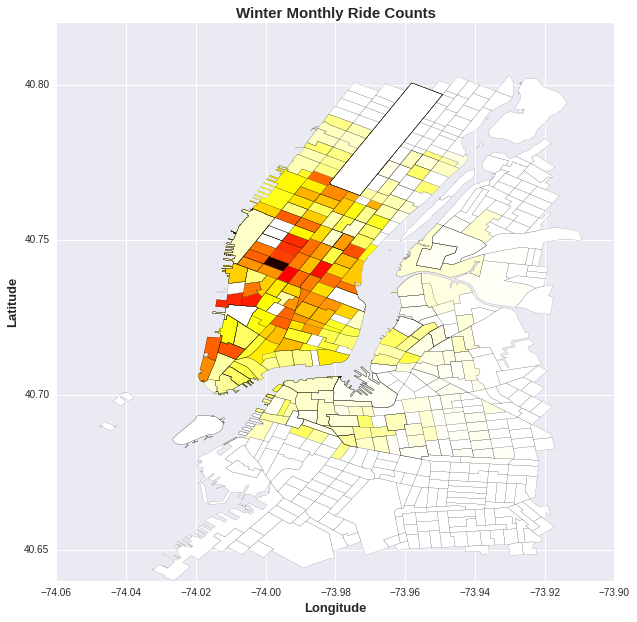

In [38]:
f, ax = plt.subplots(figsize=(10,10))
ct_shape_MonthlyAve_Winter_Zoom=(ct_shape_MonthlyAve_Winter[ct_shape_MonthlyAve_Winter
                           .centroid
                           .apply(lambda c:c.x>-74.1 and 
                                  c.x<-73.92 and 
                                  c.y>40.65 and 
                                  c.y<40.8)])
ct_shape_MonthlyAve_Winter_Zoom.plot(column='MA_Winter',cmap='hot_r',
                         alpha=1,linewidth=0.1,ax=ax)
plt.xlabel('Longitude', fontsize = 13, fontweight = 'bold')
plt.ylabel('Latitude', fontsize = 13, fontweight = 'bold')
plt.title("Winter Monthly Ride Counts", fontsize = 15, fontweight = 'bold')

#### Figure 11: The Winter-Time ride counts for the "CitiBike" Data.
- It can be observed that the data is mostly concentrated around the Manhattan area due to the high population density and ease of travel and access for the "Citi-Bikes"

In [39]:
print "Total number of CTs:", len(ct_shape)
print "Number of zoomed CTs:", len(temp.MonthlyAve)

Total number of CTs: 2166
Number of zoomed CTs: 543


### Map the monthly rides 

### Export Shapefile CTs in the CitiBike Zone

In [40]:
path='Output/ct_shape_MonthlyAve_Zoom.shp'
pathS='Output/ct_shape_MonthlyAve_Summer_Zoom.shp'
pathW='Output/ct_shape_MonthlyAve_Winter_Zoom.shp'
ct_shape_MonthlyAve_Zoom.to_file(path)
ct_shape_MonthlyAve_Summer_Zoom.to_file(pathS)
ct_shape_MonthlyAve_Winter_Zoom.to_file(pathW)

## Exploratory Geospatial Analysis

### Spatial Weights
Contiguity: Queen Weights

In [41]:
qW_CT = ps.queen_from_shapefile(path)
qW_CTS = ps.queen_from_shapefile(pathS)
qW_CTW = ps.queen_from_shapefile(pathW)

('Island id: ', [0])
('Island id: ', [0])
('Island id: ', [0])


#### Neighbors of index10

In [42]:
qW_CT[10]

{1: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0, 37: 1.0, 38: 1.0, 39: 1.0}

In [43]:
qW_CT.cardinalities[10]

9

#### Matrix of Weights

In [44]:
Wmatrix, ids = qW_CT.full()
Wmatrix_summer, ids_summer = qW_CTS.full()
Wmatrix_winter, ids_winter = qW_CTW.full()

In [45]:
Wmatrix_summer

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [46]:
qW_CT.transform = 'r'
qW_CTS.transform = 'r'
qW_CTW.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')


### Spatial Lag  
Similarity of CT neibors can be meseard by means of spatial lag as follow:
$$BikeRideCountLag = \sum_j w_{i,j} BikeRideCount$$

In [47]:
MonthlyRide=ct_shape_MonthlyAve_Zoom.MonthlyAve
MonthlyRideLag=ps.lag_spatial(qW_CT, MonthlyRide)
MonthlyRide_Summer=ct_shape_MonthlyAve_Summer_Zoom.MA_Summer
MonthlyRideLag_Summer=ps.lag_spatial(qW_CTS, MonthlyRide_Summer)
MonthlyRide_Winter=ct_shape_MonthlyAve_Winter_Zoom.MA_Winter
MonthlyRideLag_Winter=ps.lag_spatial(qW_CTW, MonthlyRide_Winter)

#### Create Quantiles for maping

In [48]:
MonthlyRideLagQ10 = ps.Quantiles(MonthlyRideLag, k=10)
MonthlyRideLagQ10_Summer = ps.Quantiles(MonthlyRideLag_Summer, k=10)
MonthlyRideLagQ10_Winter = ps.Quantiles(MonthlyRideLag_Winter, k=10)
MonthlyRideLagQ10_Winter

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    55.143                 2
   55.143 < x[i] <=   902.271                78
  902.271 < x[i] <=  2165.333                80
 2165.333 < x[i] <=  3452.913                79
 3452.913 < x[i] <=  5014.083                80
 5014.083 < x[i] <= 11249.113                79
11249.113 < x[i] <= 15205.882                80
15205.882 < x[i] <= 18477.420                79
18477.420 < x[i] <= 29902.786                80

#### Map the monthly rides lag

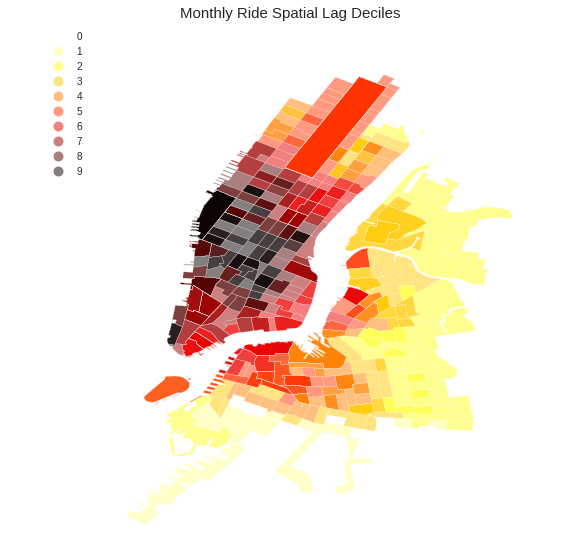

In [49]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=MonthlyRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Monthly Ride Spatial Lag Deciles", fontsize = 15)

#### Figure 12: The Spatial Lag for the Monthly Ridership throughout the Year.
- It can be observed here over and over again, how concentrated the data is around Manhattan.
- It can also be observed that the lag and the quantiles are concentratedly more superimposing around the same area.

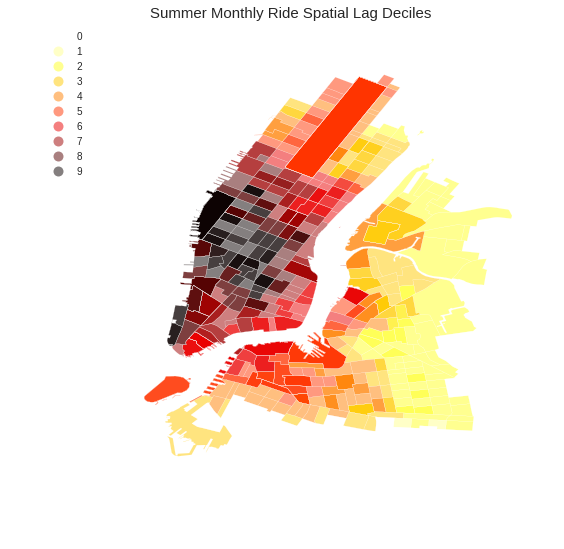

In [50]:
f, ax1 = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Summer_Zoom.assign(cl=MonthlyRideLagQ10_Summer.yb).\
plot(column='cl', categorical=True, 
     k=10, cmap='hot_r', linewidth=0.1, ax=ax1, 
     edgecolor='white', legend=True)
ax1.set_axis_off()
plt.title("Summer Monthly Ride Spatial Lag Deciles", fontsize = 15)

#### Figure 13: The Spatial Lag for the only-Summer-time Monthly Ridership throughout the Year.
- It can be observed here over and over again, how concentrated the data is around Manhattan.
- It can also be observed that the lag and the quantiles are concentratedly more superimposing around the same area.

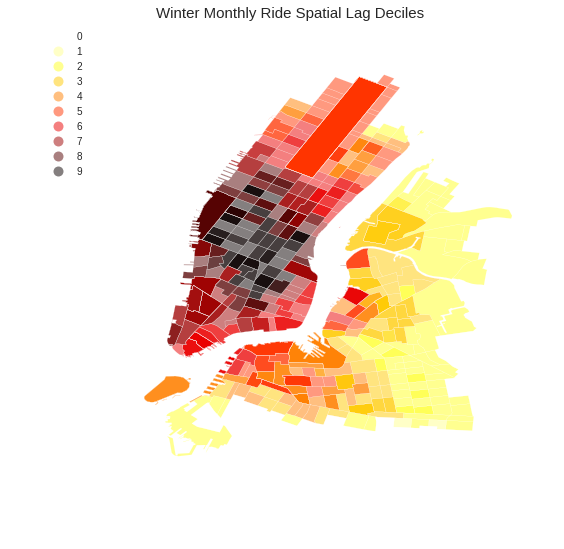

In [51]:
f, ax2 = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Winter_Zoom.assign(cl=MonthlyRideLagQ10_Winter.yb).\
plot(column='cl', categorical=True, 
     k=10, cmap='hot_r', linewidth=0.1, ax=ax2, 
     edgecolor='white', legend=True)
ax2.set_axis_off()
plt.title("Winter Monthly Ride Spatial Lag Deciles", fontsize = 15)

#### Figure 14: The Spatial Lag for the only-Winter-time Monthly Ridership throughout the Year.
- It can be observed here over and over again, how concentrated the data is around Manhattan.
- It can also be observed that the lag and the quantiles are concentratedly more superimposing around the same area.

## Global  Spatial Autocorrelation

In [52]:
b, a = np.polyfit(MonthlyRide, MonthlyRideLag, 1)
b_summer, a_summer = np.polyfit(MonthlyRide_Summer, MonthlyRideLag_Summer, 1)
b_winter,a_winter = np.polyfit(MonthlyRide_Winter, MonthlyRideLag_Winter, 1)
b_summer,a_summer 

(0.6438931431258913, 5682.9310787418508)

### Moran Scatterplot

- The four quadrants in the graph provide a classification of four types of spatial autocorrelation: 
    - high-high (upper right) 
    - low-low (lower left)
- For positive spatial autocorrelation: 
    - high-low (lower right) 
- For negative spatial autocorrelation:
    - low-high (upper left). 

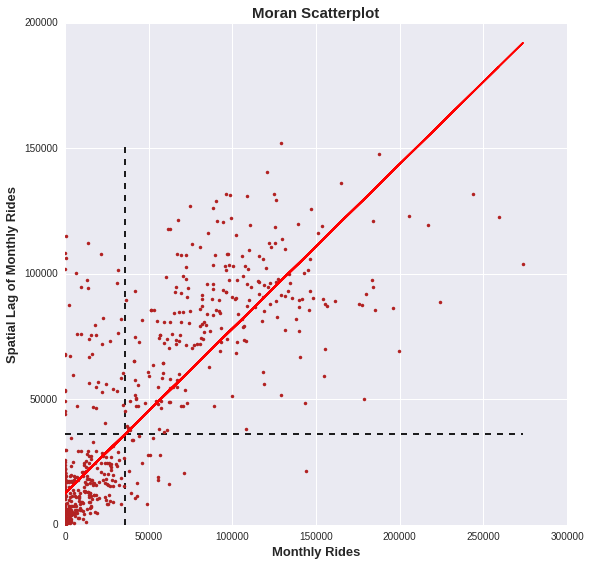

In [54]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide, MonthlyRideLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot', fontsize = 15, fontweight = 'bold')
plt.ylabel('Spatial Lag of Monthly Rides', fontsize = 13, fontweight = 'bold')
plt.xlabel('Monthly Rides', fontsize = 13, fontweight = 'bold')

#### Figure 15: The Spatial Lag for the Moran's Scatterplot for the Rides throughout the year.
- It can be observed that the Spatial Autocorrelation here is more towards the:
    - high-high (upper right)
    - low-low (lower left)

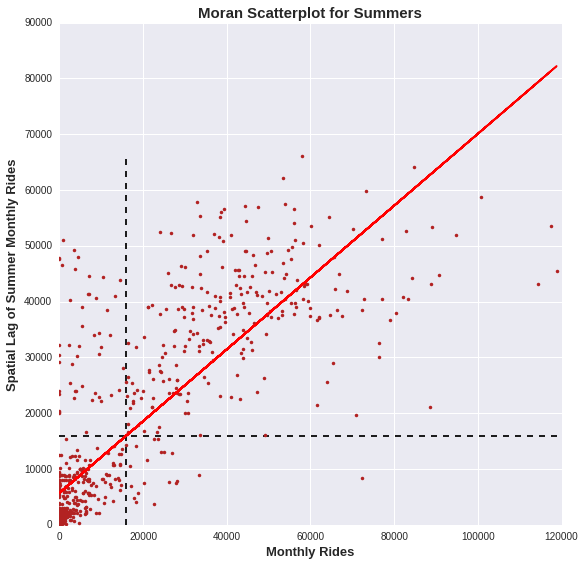

In [55]:
f, ax1 = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide_Summer, MonthlyRideLag_Summer, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide_Summer.mean(), MonthlyRideLag_Summer.min(), 
           MonthlyRideLag_Summer.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag_Summer.mean(), MonthlyRide_Summer.min(), 
           MonthlyRide_Summer.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide_Summer, a_summer + b_summer*MonthlyRide_Summer, 'r')
plt.title('Moran Scatterplot for Summers', fontsize = 15, fontweight = 'bold')
plt.ylabel('Spatial Lag of Summer Monthly Rides', fontsize = 13, fontweight = 'bold')
plt.xlabel('Monthly Rides', fontsize = 13, fontweight = 'bold')

#### Figure 16: The Spatial Lag for the Moran's Scatterplot for the Rides through the Summer-Months.
- It can be observed that the Spatial Autocorrelation here is more towards the:
    - high-high (upper right)
    - low-low (lower left)

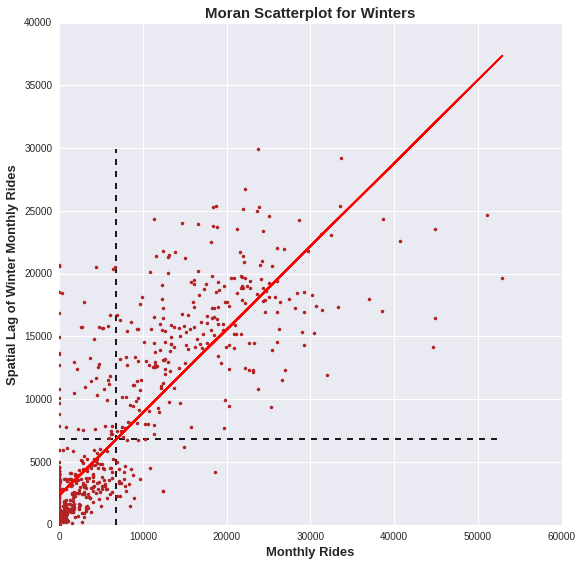

In [56]:
f, ax2 = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide_Winter, MonthlyRideLag_Winter, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide_Winter.mean(), MonthlyRideLag_Winter.min(),
           MonthlyRideLag_Winter.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag_Winter.mean(), MonthlyRide_Winter.min(), 
           MonthlyRide_Winter.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide_Winter, a_winter + b_winter*MonthlyRide_Winter, 'r')
plt.title('Moran Scatterplot for Winters', fontsize = 15, fontweight = 'bold')
plt.ylabel('Spatial Lag of Winter Monthly Rides', fontsize = 13, fontweight = 'bold')
plt.xlabel('Monthly Rides', fontsize = 13, fontweight = 'bold')

#### Figure 17: The Spatial Lag for the Moran's Scatterplot for the Rides througho the Winter-Months.
- It can be observed that the Spatial Autocorrelation here is more towards the:
    - high-high (upper right)
    - low-low (lower left)

### Moran's I
- The slope of the regression line is Moran’s I.

In [58]:
I_MonthlyRide = ps.Moran(MonthlyRide, qW_CT)
I_MonthlyRide_Summer = ps.Moran(MonthlyRide_Summer, qW_CTS)
I_MonthlyRide_Winter = ps.Moran(MonthlyRide_Winter, qW_CTW)

In [59]:
print 'Monthly:',I_MonthlyRide.I, I_MonthlyRide.p_sim
print 'Summer:', I_MonthlyRide_Summer.I, I_MonthlyRide_Summer.p_sim
print 'Winter:', I_MonthlyRide_Winter.I, I_MonthlyRide_Winter.p_sim

Monthly: 0.655793329084 0.001
Summer: 0.644069499068 0.001
Winter: 0.662044196711 0.001


Thus, the $I$ statistic is $0.656$ for this data, and has a very small $p$ value. 

In [60]:
I_MonthlyRide.sim[0:10]

array([-0.00498137, -0.00316565, -0.00112666, -0.0123494 ,  0.00533465,
       -0.02010205, -0.0073338 , -0.02908611,  0.02624004,  0.02488917])

### KDEplot of all of the simulated points
- The vertical line is seen to be the Observed Value.

- What you are actually doing with the Kernel Density Estimation is estimating the probability density function. 
- This makes the interpretation straightforward. 
- So the area under the curve is 1, and the probability of a value being between x1 and x2 is the area under the curve between those two points.

- The number of Y values will determine the "resolution" of the curve, so if you assume a straight line between every two adjacent Y points you can calculate an approximation of the area under the curve between those two points.

In [61]:
plt.rcParams['figure.figsize']=(14,8)

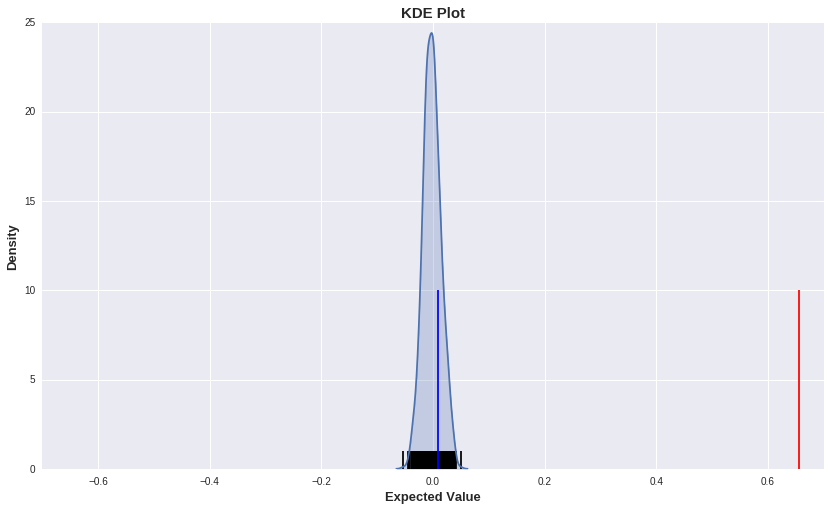

In [77]:
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.I, 0, 10, 'r')
plt.vlines(I_MonthlyRide.EI+.01, 0, 10, 'blue')
plt.xlim([-.70, .70])
plt.title('KDE Plot', fontsize = 15, fontweight = 'bold')
plt.xlabel('Expected Value', fontsize = 13, fontweight = 'bold')
plt.ylabel('Density', fontsize = 13, fontweight = 'bold')

#### Figure 18: Kernel Density Plot throughout the year.
- Explanation given at the start about how the interpretation should be considered.

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

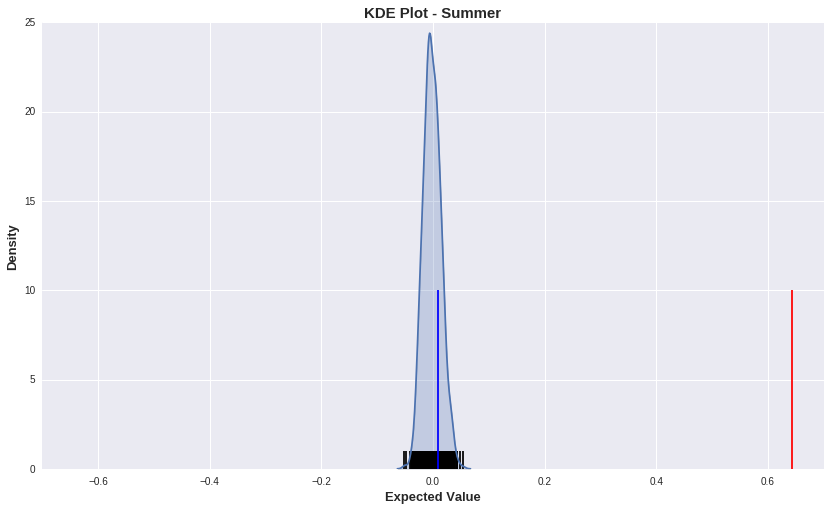

In [78]:
sns.kdeplot(I_MonthlyRide_Summer.sim, shade=True)
plt.vlines(I_MonthlyRide_Summer.sim, 0, 1)
plt.vlines(I_MonthlyRide_Summer.I, 0, 10, 'r')
plt.vlines(I_MonthlyRide_Summer.EI+.01, 0, 10, 'blue')
plt.xlim([-.70, .70])
plt.title('KDE Plot - Summer', fontsize = 15, fontweight = 'bold')
plt.xlabel('Expected Value', fontsize = 13, fontweight = 'bold')
plt.ylabel('Density', fontsize = 13, fontweight = 'bold')

#### Figure 19: Kernel Density Plot through the Summer.
- Explanation given at the start about how the interpretation should be considered.

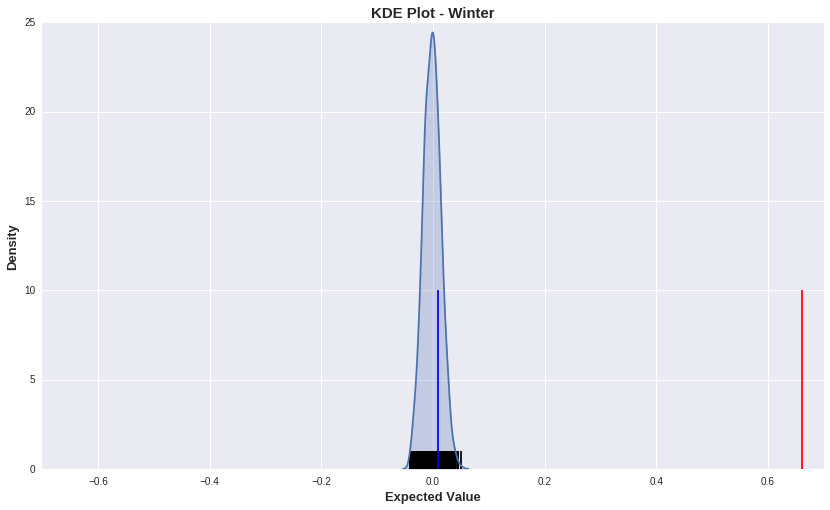

In [79]:
sns.kdeplot(I_MonthlyRide_Winter.sim, shade=True)
plt.vlines(I_MonthlyRide_Winter.sim, 0, 1)
plt.vlines(I_MonthlyRide_Winter.I, 0, 10, 'r')
plt.vlines(I_MonthlyRide_Winter.EI+.01, 0, 10, 'blue')
plt.xlim([-.70, .70])
plt.title('KDE Plot - Winter', fontsize = 15, fontweight = 'bold')
plt.xlabel('Expected Value', fontsize = 13, fontweight = 'bold')
plt.ylabel('Density', fontsize = 13, fontweight = 'bold')

#### Figure 20: Kernel Density Plot through the Winter.
- Explanation given at the start about how the interpretation should be considered.

## Local  Spatial Autocorrelation

In [65]:
LMo_MonthlyRide = ps.Moran_Local(MonthlyRide, qW_CT,permutations=999)
LMo_MonthlyRide_Summer = ps.Moran_Local(MonthlyRide_Summer, qW_CTS,permutations=999)
LMo_MonthlyRide_Winter = ps.Moran_Local(MonthlyRide_Winter, qW_CTW,permutations=999)

In [66]:
LMo_MonthlyRide_Winter.Is[0:5], LMo_MonthlyRide_Winter.p_sim[0:5]

(array([-0.        , -0.3153042 , -0.00110645, -0.00100209, -0.06082761]),
 array([ 0.001,  0.13 ,  0.458,  0.487,  0.429]))

### LISA (Local Indicators of Spatial Autocorrelation)
- This yields a measure of spatial autocorrelation for each individual location.
- The input needed for the LISA statistics is the same as for the global spatial autocorrelation statistics. 
- First, one or two variable names (or Event and Base for rates) must be selected. 
- Next, a spatial weights file must be specified.

In [67]:
sigs = MonthlyRide[LMo_MonthlyRide.p_sim <= .001]
W_sigs = MonthlyRideLag[LMo_MonthlyRide.p_sim <= .001]
insigs = MonthlyRide[LMo_MonthlyRide.p_sim > .001]
W_insigs = MonthlyRideLag[LMo_MonthlyRide.p_sim > .001]

sigs_summer = MonthlyRide_Summer[LMo_MonthlyRide_Summer.p_sim <= .001]
W_sigs_summer = MonthlyRideLag_Summer[LMo_MonthlyRide_Summer.p_sim <= .001]
insigs_summer = MonthlyRide_Summer[LMo_MonthlyRide_Summer.p_sim > .001]
W_insigs_summer = MonthlyRideLag_Summer[LMo_MonthlyRide_Summer.p_sim > .001]

sigs_winter = MonthlyRide_Winter[LMo_MonthlyRide_Winter.p_sim <= .001]
W_sigs_winter = MonthlyRideLag_Winter[LMo_MonthlyRide_Winter.p_sim <= .001]
insigs_winter = MonthlyRide_Winter[LMo_MonthlyRide_Winter.p_sim > .001]
W_insigs_winter = MonthlyRideLag_Winter[LMo_MonthlyRide_Winter.p_sim > .001]

### Plot Signficant LISA

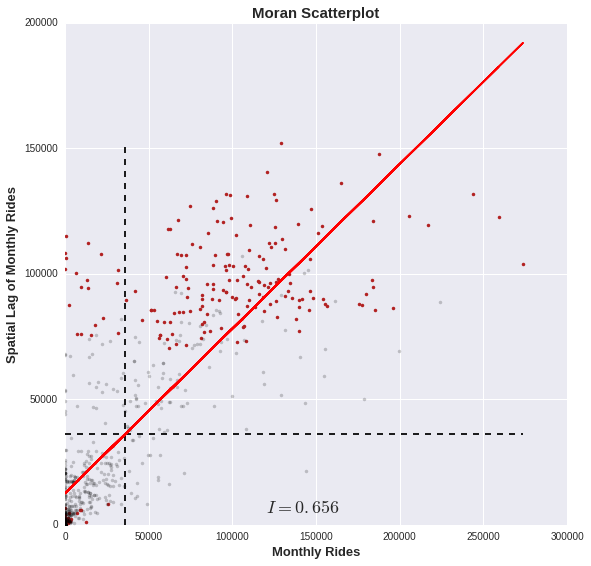

In [68]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot', fontsize = 15, fontweight = 'bold')
plt.ylabel('Spatial Lag of Monthly Rides', fontsize = 13, fontweight = 'bold')
plt.xlabel('Monthly Rides', fontsize = 13, fontweight = 'bold')

#### Figure 21: The LISA Significance over the Moran's I for Rides through the year.
- The LISA interpretation is based on the same principle as the Bivariate Moran’s I, but is localized.
- The slope of the regression line is Moran’s I(seen here at the bottom of the graph).

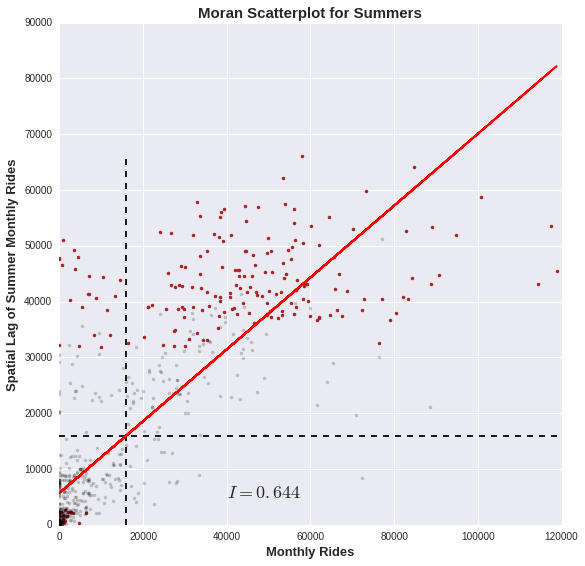

In [69]:
f, ax1 = plt.subplots(figsize=(9, 9))
plt.plot(sigs_summer, W_sigs_summer, '.', color='firebrick')
plt.plot(insigs_summer, W_insigs_summer, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide_Summer.I, x=40000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide_Summer.mean(), MonthlyRideLag_Summer.min(), 
           MonthlyRideLag_Summer.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag_Summer.mean(), MonthlyRide_Summer.min(), 
           MonthlyRide_Summer.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide_Summer, a_summer + b_summer*MonthlyRide_Summer, 'r')
plt.title('Moran Scatterplot for Summers', fontsize = 15, fontweight = 'bold')
plt.ylabel('Spatial Lag of Summer Monthly Rides', fontsize = 13, fontweight = 'bold')
plt.xlabel('Monthly Rides', fontsize = 13, fontweight = 'bold')

#### Figure 22: The LISA Significance over the Moran's I for Rides through the Summer-Months.
- The LISA interpretation is based on the same principle as the Bivariate Moran’s I, but is localized.
- The slope of the regression line is Moran’s I(seen here at the bottom of the graph).

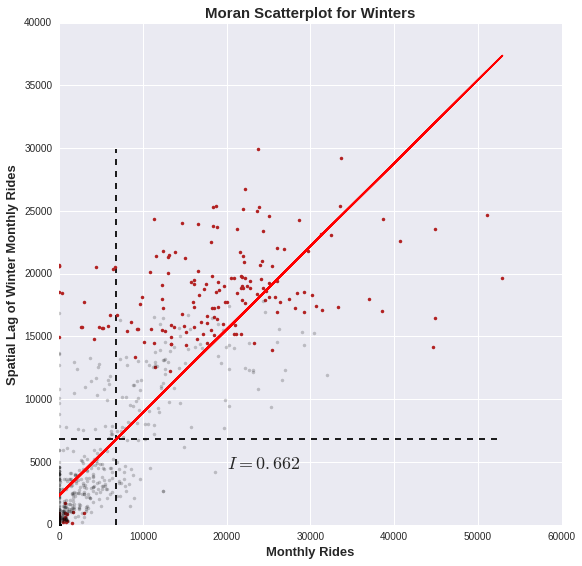

In [70]:
f, ax2 = plt.subplots(figsize=(9, 9))
plt.plot(sigs_winter, W_sigs_winter, '.', color='firebrick')
plt.plot(insigs_winter, W_insigs_winter, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide_Winter.I, x=20000, y=4500, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide_Winter.mean(), MonthlyRideLag_Winter.min(), 
           MonthlyRideLag_Winter.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag_Winter.mean(), MonthlyRide_Winter.min(), 
           MonthlyRide_Winter.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide_Winter, a_winter + b_winter*MonthlyRide_Winter, 'r')
plt.title('Moran Scatterplot for Winters', fontsize = 15, fontweight = 'bold')
plt.ylabel('Spatial Lag of Winter Monthly Rides', fontsize = 13, fontweight = 'bold')
plt.xlabel('Monthly Rides', fontsize = 13, fontweight = 'bold')

#### Figure 23: The LISA Significance over the Moran's I for Rides through the Winter-Months.
- The LISA interpretation is based on the same principle as the Bivariate Moran’s I, but is localized.
- The slope of the regression line is Moran’s I(seen here at the bottom of the graph).

### Hot and Cold spots 

In [71]:
sig = LMo_MonthlyRide.p_sim < 0.01
hotspots = LMo_MonthlyRide.q==1 * sig
coldspots = LMo_MonthlyRide.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()

Number of Hotspots: 191
Number of Coldspots: 233


In [72]:
sig_summer = LMo_MonthlyRide_Summer.p_sim < 0.01
hotspots_summer = LMo_MonthlyRide_Summer.q==1 * sig_summer
coldspots_summer = LMo_MonthlyRide_Summer.q==3 * sig_summer
print "Number of Hotspots:", hotspots_summer.sum()
print "Number of Coldspots:", coldspots_summer.sum()

Number of Hotspots: 189
Number of Coldspots: 237


In [73]:
sig_winter = LMo_MonthlyRide_Winter.p_sim < 0.01
hotspots_winter = LMo_MonthlyRide_Winter.q==1 * sig_winter
coldspots_winter = LMo_MonthlyRide_Winter.q==3 * sig_winter
print "Number of Hotspots:", hotspots_winter.sum()
print "Number of Coldspots:", coldspots_winter.sum()

Number of Hotspots: 196
Number of Coldspots: 211


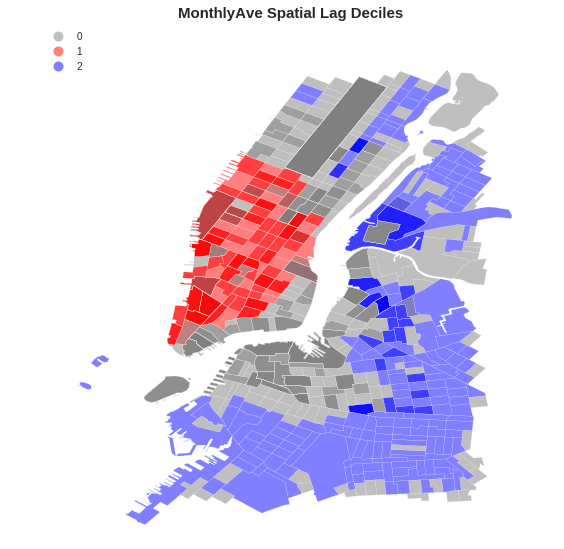

In [74]:
hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=hotcold).plot(column='cl', categorical=True, 
         cmap=hcmap, linewidth=0.1, ax=ax, 
         edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("MonthlyAve Spatial Lag Deciles", fontsize = 15, fontweight = 'bold')

#### Figure 24: The Hot and Cold Spatial Lag for rides throughout the year.

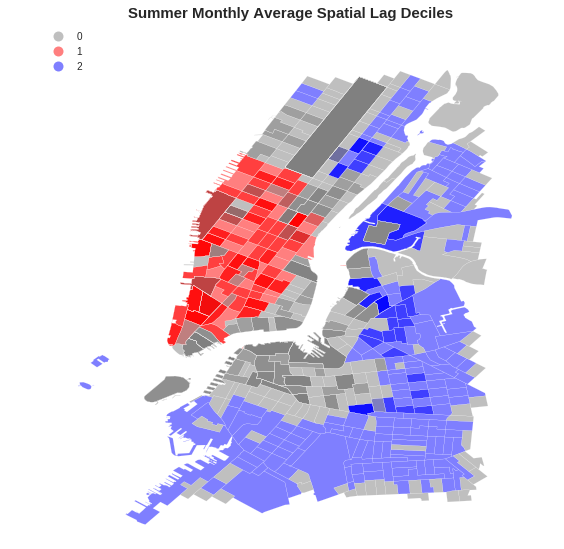

In [75]:
hcmap_summer = colors.ListedColormap(['grey','red','blue'])
hotcold_summer = hotspots_summer*1 + coldspots_summer*2

f, ax1 = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Summer_Zoom.assign(cl=hotcold_summer).plot(column='cl', 
         categorical=True, 
         cmap=hcmap_summer, linewidth=0.1, ax=ax1, 
         edgecolor='white', legend=True)
ax1.set_axis_off()
plt.title("Summer Monthly Average Spatial Lag Deciles", fontsize = 15, fontweight = 'bold')

#### Figure 25: The Hot and Cold Spatial Lag for rides throughout the Summer-Months.

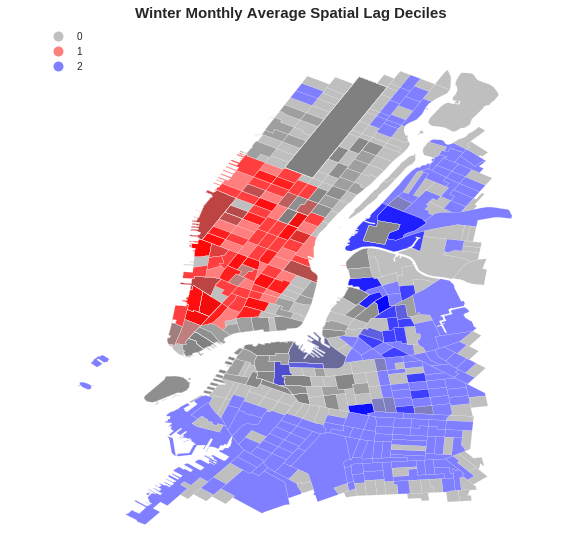

In [76]:
hcmap_winter = colors.ListedColormap(['grey','red','blue'])
hotcold_winter = hotspots_winter*1 + coldspots_winter*2

f, ax2 = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Winter_Zoom.assign(cl=hotcold_winter).plot(column='cl', 
         categorical=True, 
         cmap=hcmap_winter, linewidth=0.1, ax=ax2, 
         edgecolor='white', legend=True)
ax2.set_axis_off()
plt.title("Winter Monthly Average Spatial Lag Deciles", fontsize = 15, fontweight = 'bold')

#### Figure 26: The Hot and Cold Spatial Lag for rides throughout the Winter-Months.